# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})
import datetime
from datetime import datetime
import seaborn as sns
import datetime
now = datetime.datetime.now()
from sklearn.model_selection import train_test_split

# 2. Loading Data from Postgres and GUI

In [3]:
df=pd.read_csv('train.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.isna().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

In [118]:
df.iloc[0]

date           2013-01-01
store_nbr              25
item_nbr           103665
unit_sales              7
onpromotion           NaN
Name: 0, dtype: object

In [83]:
item_number=103665
#store_number=     #GUI inputs
#on_promotion=
#date=

In [84]:
#subset=pd.read_csv('item_108701.csv')
subset=df.loc[df['item_nbr']==item_number]     #Load Data from Postgres according to GUI inputs

# 3. Data Transformation and combining

### 3.1 Holiday Dataset

In [85]:
holiday=pd.read_csv('holidays_events.csv')
holiday['type'] = pd.factorize(holiday['type'])[0]
holiday['locale'] = pd.factorize(holiday['locale'])[0]  #loading and transforming Holiday dataset
holiday['locale_name'] = pd.factorize(holiday['locale_name'])[0]
holiday['holiday_status']=1
#holiday.drop(['type','locale','locale_name'],inplace=True,axis=1)

### 3.2 Stores Dataset

In [86]:
stores=pd.read_csv('stores.csv')
stores['city']=pd.factorize(stores['city'])[0]
stores['state']=pd.factorize(stores['state'])[0]
stores['type']=pd.factorize(stores['type'])[0]
#stores.drop(['type','state','city'],inplace=True,axis=1)

### 3.3 Items Dataset

In [87]:
items=pd.read_csv('items.csv')
items['family']=pd.factorize(items['family'])[0]

### 3.4 Transformation

In [88]:
subset['onpromotion']=pd.factorize(subset['onpromotion'])[0]
subset.dropna(inplace=True,axis=0,how='any')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 3.5 Converting Date into number of days

In [89]:
current_year=now.year
current_month=now.month
current_day=now.day

#### 3.5.1Subset Date to Duration

In [90]:
subset['date'] = pd.to_datetime(subset['date'], format = '%Y-%m-%d')   #transforming date Column
subset_year = subset['date'].dt.year
subset_month = subset['date'].dt.month
subset_day = subset['date'].dt.day
subset['Duration'] = ((current_year * 365) + (current_month * 30) + current_day) - ((subset_year*365) + (subset_month*30) + subset_day)
subset.drop('date',axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

#### 3.5.2 Holiday Date to Duration

In [91]:
holiday['date'] = pd.to_datetime(holiday['date'], format = '%d/%m/%Y')   #transforming date Column
holiday_year = holiday['date'].dt.year
holiday_month = holiday['date'].dt.month
holiday_day = holiday['date'].dt.day
holiday['Duration'] = ((current_year * 365) + (current_month * 30) + current_day) - ((holiday_year*365) + (holiday_month*30) + holiday_day)
holiday.drop('date',axis=1,inplace=True)

### 3.6 Joining datasets

In [92]:
#subset=subset.merge(holiday, left_on='Duration', right_on='Duration', how='left')
#subset=subset.merge(stores, left_on='store_nbr', right_on='store_nbr', how='left')
#subset=subset.merge(items, left_on='item_nbr', right_on='item_nbr', how='left')

In [93]:
subset.fillna('99',inplace=True)
#subset.drop('Unnamed: 0',axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [94]:
subset

,id,store_nbr,item_nbr,unit_sales,onpromotion,Duration
0,0,25,103665,7.0,-1,2103
578,578,1,103665,2.0,-1,2102
1596,1596,2,103665,5.0,-1,2102
2699,2699,3,103665,6.0,-1,2102
3900,3900,4,103665,2.0,-1,2102
4949,4949,5,103665,9.0,-1,2102
5984,5984,6,103665,6.0,-1,2102
7109,7109,7,103665,4.0,-1,2102
8187,8187,8,103665,6.0,-1,2102
9391,9391,9,103665,12.0,-1,2102


# 4. Splitting Train and Test dataset

In [95]:
X_train,X_test,y_train,y_test=train_test_split(subset.drop(['id','unit_sales'],axis=1),subset['unit_sales'],test_size=0.3)

# 5. Classifiers

## 5.1 Poly Regressor

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [97]:
poly = PolynomialFeatures(degree=20)
X_trans_train = poly.fit_transform(X_train)
X_trans_test = poly.fit_transform(X_test)

In [98]:
lg = LinearRegression()
lg.fit(X_trans_train, y_train)
pr_pred = lg.predict(X_trans_test)

In [99]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,pr_pred))
print('MSE:', metrics.mean_squared_error(y_test, pr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pr_pred)))

MAE: 2.481638803220559
MSE: 11.826742746000667
RMSE: 3.4390031616735492


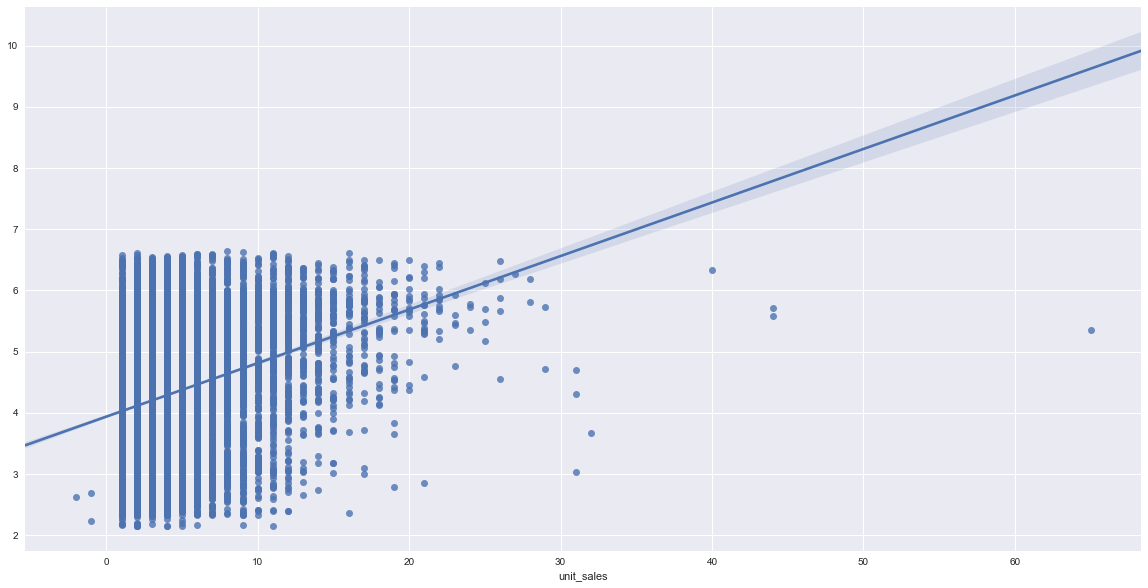

In [100]:
sns.regplot(x=y_test, y=pr_pred, data=subset)

## 5.2 Random Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
lm = RandomForestRegressor(n_estimators=20)
lm.fit(X_train, y_train)
lm_predict = lm.predict(X_test)

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,lm_predict))
print('MSE:', metrics.mean_squared_error(y_test, lm_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predict)))

MAE: 2.5660919187628806
MSE: 13.329427975879593
RMSE: 3.6509489144439686


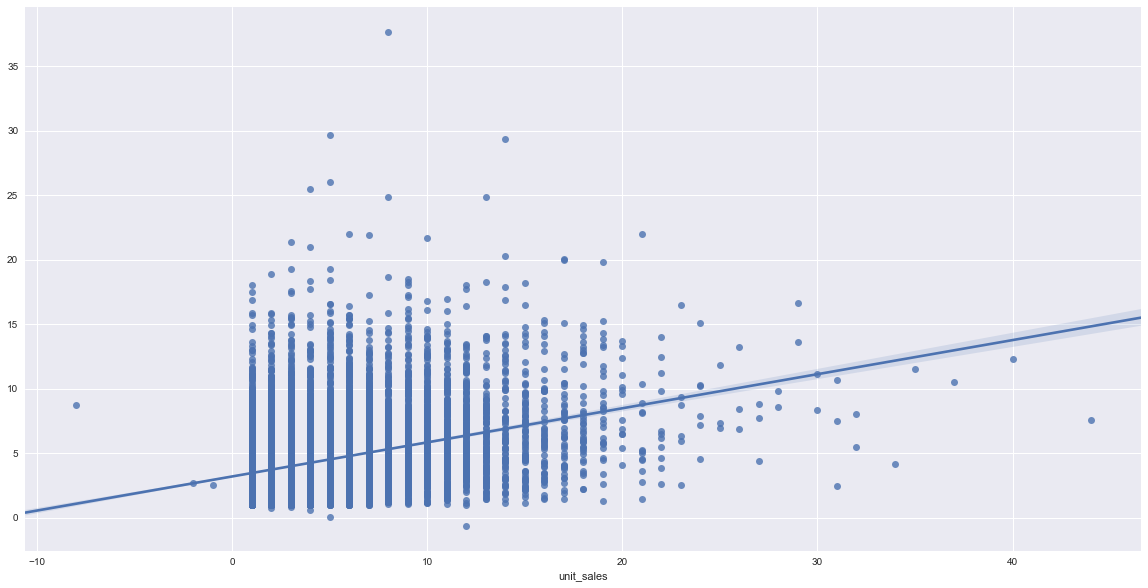

In [61]:
sns.regplot(x=y_test, y=lm_predict, data=subset)

## 5.3 KernelRidge Regressor

In [34]:
from sklearn.kernel_ridge import KernelRidge

In [35]:
kr = KernelRidge(alpha=1.0)
kr.fit(X_train, y_train)
kr_predict = kr.predict(X_test)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, kr_predict))
print('MSE:', metrics.mean_squared_error(y_test, kr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, kr_predict)))

MAE: 2.4798616441461983
MSE: 12.183636800142732
RMSE: 3.490506668113203


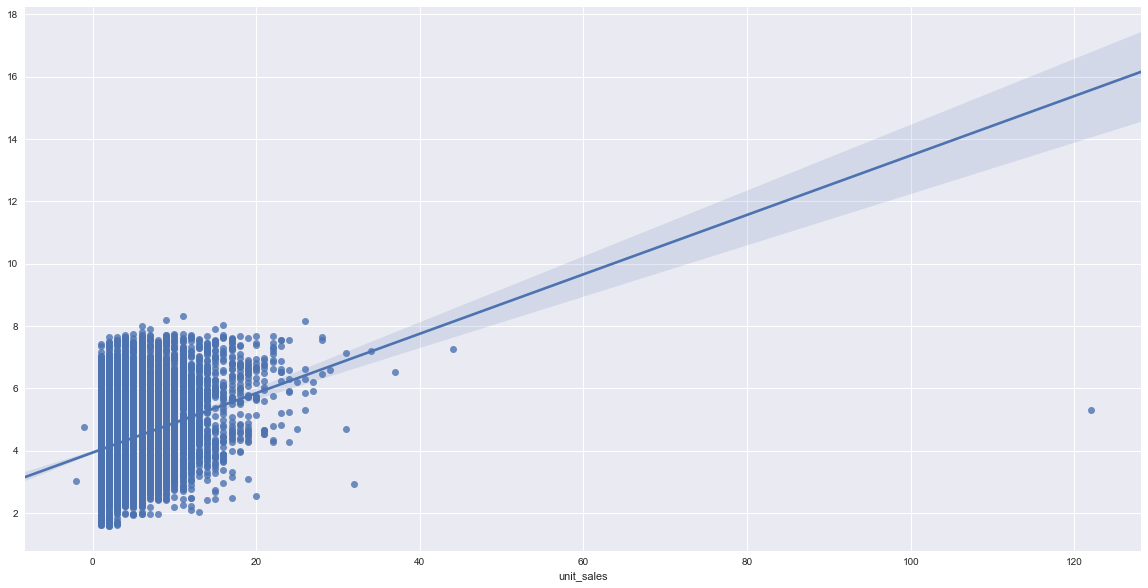

In [37]:
sns.regplot(x=y_test, y=kr_predict, data=subset)

## Predicting output according to GUI input

In [66]:
subset['minmax_unitsales']=(subset['unit_sales']-subset['unit_sales'].min())/(subset['unit_sales'].max()-subset['unit_sales'].min())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


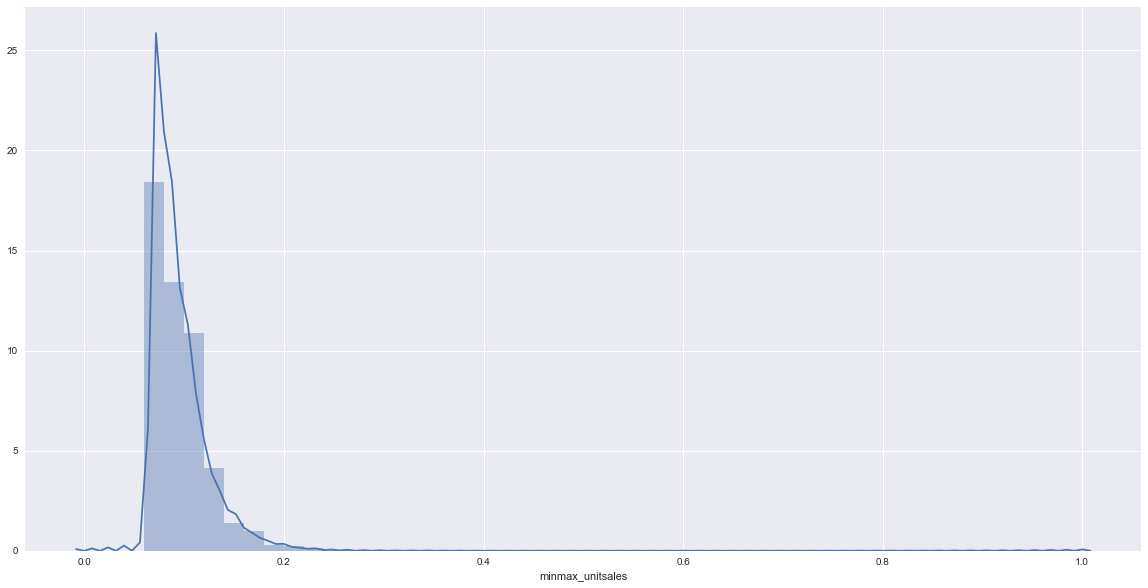

In [68]:
sns.distplot(subset['minmax_unitsales'])